# Grupo e Objetivos

Nosso grupo é composto pelos seguintes integrantes:
- Guilherme Souza (gms4)
- Thais Couto (tvc)
- Lorena Vilaça (lcjbv2)
- Renatto Padilha (rspf)

E decidimos fazer uma análise do dataset a seguir: https://www.kaggle.com/datasets/uciml/mushroom-classification

Objetivos:
- Analisar a situação quantitativa da proporção de tipos diferentes de espécies de cogumelos e sua respectiva categoria (comestível, tóxica ou incerto);
- Entender os aspectos que apontam mais para categorias específicas (qual cor de cogumelo ou formato leva o cogumelo a ter mais mais probabilidade de ser tóxico, por exemplo);
- Descrever o dataset por meio de gráficos, detalhando alguns aspectos importantes;
- Analisar o dataset dado com três algoritmos de predição diferentes (KNN, Naive Bayes e Decision Tree);
- Dada essa análise, entender a eficiência de cada algoritmo usado.

# Inicializando

In [ ]:
# Importando bibliotecas que usaremos

import numpy as np
import plotly.graph_objs as go
import plotly.express as px
import pandas as pd
import warnings
warnings.simplefilter("ignore")
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as pltpy
from matplotlib.colors import ListedColormap
%matplotlib inline
plt.style.use('ggplot')

In [ ]:
# Importando dataset
# Visualização limitada pelo colab mas o dataset é pego totalmente

dataset = pd.read_csv("mushrooms.csv")
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
# Analisando inconsistências

dataset.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

# Fazendo uma breve descrição do dataset
- Class é a categoria do cogumelo, e categorizamos em edible (comestível) e poisonous (tóxico);
- Cap é a polpa do cogumelo, e analisamos cor, formato e descrição da superfície;
- Bruises são equimoses, e analisamos se o cogumelo em questão possui equimoses ou não;
- Odor já fala por si só;
- Gill é o talo do cogumelo, e analisamos em tipo de conexão com a polpa (gill-attachment), o espaçamento (gill-spacing), o tamanho (gill-size) e cor (gill-color)

In [ ]:
dataset.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [ ]:
# A primeira coluna é responsiva, e as outras são de predição, então vamos separá-las

X = dataset.drop('class', axis = 1)
y = dataset['class']
print(X.info())
X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises                   8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                8124 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


# Pré-processando


In [ ]:
# Codificando
# A análise a partir de agora fica quantitativa, não mais descritiva 

from sklearn.preprocessing import LabelEncoder
dataset_encoded = dataset.copy()
Encoder_X = LabelEncoder()
for i in X.columns:
    X[i] = Encoder_X.fit_transform(X[i])
    dataset_encoded[i] = Encoder_X.fit_transform(dataset_encoded[i])
Encoder_y = LabelEncoder()
y = Encoder_y.fit_transform(y)

In [ ]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [ ]:
# Analisando y e sabendo que tóxico = 1 e comestível = 0, temos:

y

array([1, 0, 0, ..., 0, 1, 0])

# Análises gráficas e detalhamento do dataset antes das predições

In [ ]:
# Preparando a análise gráfica

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [ ]:
# Função para plotar os gráficos

def plot_col(col, hue=None, color=['purple', 'blue'], labels=None):
    fig, ax = pltpy.subplots(figsize=(15, 7))
    sns.countplot(col, hue=hue, palette=color, saturation=0.6, data=dataset_encoded, dodge=True, ax=ax)
    ax.set(title = f"Mushroom {col.title()} Quantity", xlabel=f"{col.title()}", ylabel="Quantity")
    if labels!=None:
        ax.set_xticklabels(labels)
    if hue!=None:
        ax.legend(('Poisonous', 'Edible'), loc=0)

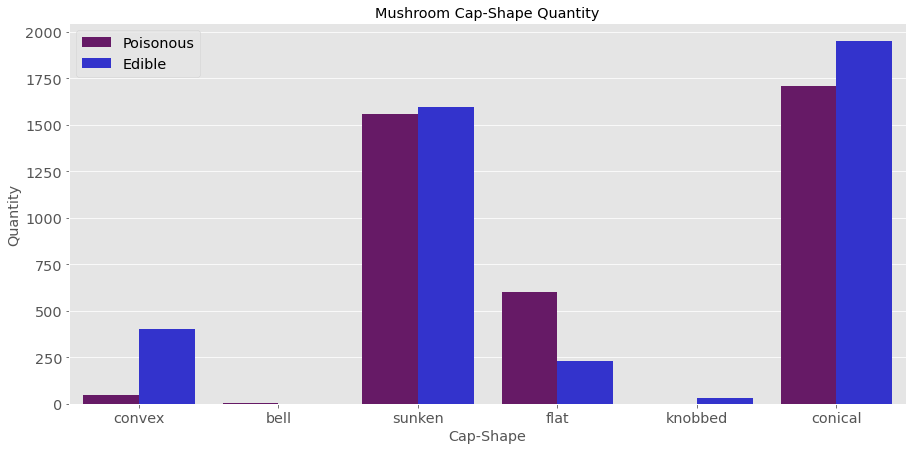

In [ ]:
# Análise da quantidade de cogumenos tóxicos e comestíveis de acordo com o formato de sua polpa

shape_dict = {"bell":"b","conical":"c","convex":"x","flat":"f", "knobbed":"k","sunken":"s"}
labels = ('convex', 'bell', 'sunken', 'flat', 'knobbed', 'conical')
plot_col(col='cap-shape', hue='class', labels=labels)

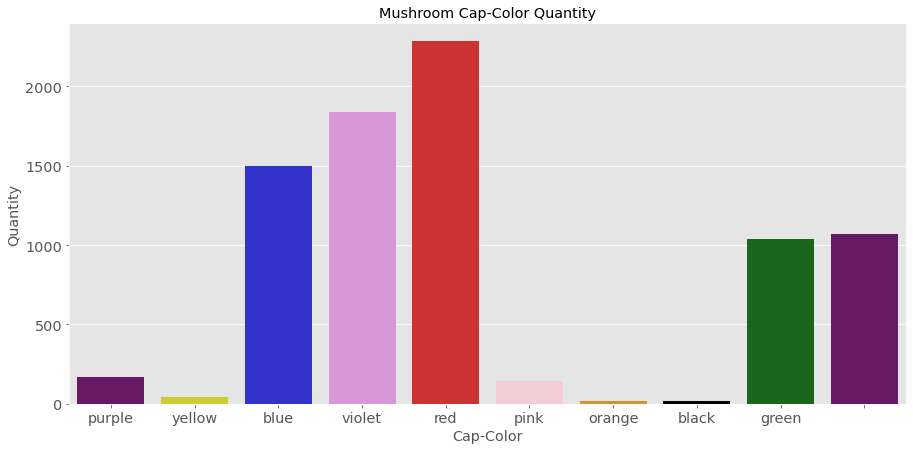

In [ ]:
# Análise da quantidade de cogumelos de acordo com cor

color_dict = {"purple":"n","yellow":"y", "blue":"w", "violet":"g", "red":"e","pink":"p",
              "orange":"b", "purple":"u", "black":"c", "green":"r"}
plot_col(col='cap-color', color=color_dict.keys(), labels=color_dict)

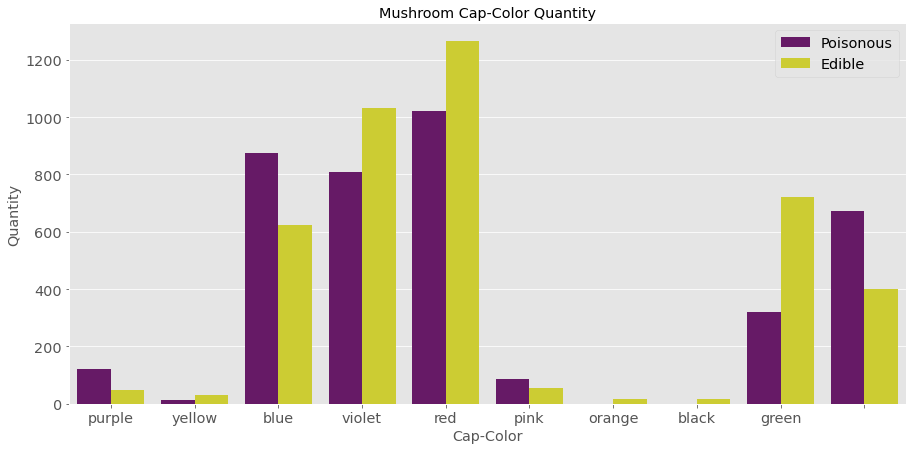

In [ ]:
# Análise da quantidade de cogumelos de acordo com cor, separados em tóxico e comestível

color_dict = {"purple":"n","yellow":"y", "blue":"w", "violet":"g", "red":"e","pink":"p",
              "orange":"b", "purple":"u", "black":"c", "green":"r"}
plot_col(col='cap-color', hue='class', color=color_dict.keys(), labels=color_dict)

In [ ]:
def get_labels(order, a_dict):    
    labels = []
    for values in order:
        for key, value in a_dict.items():
            if values == value:
                labels.append(key)
    return labels

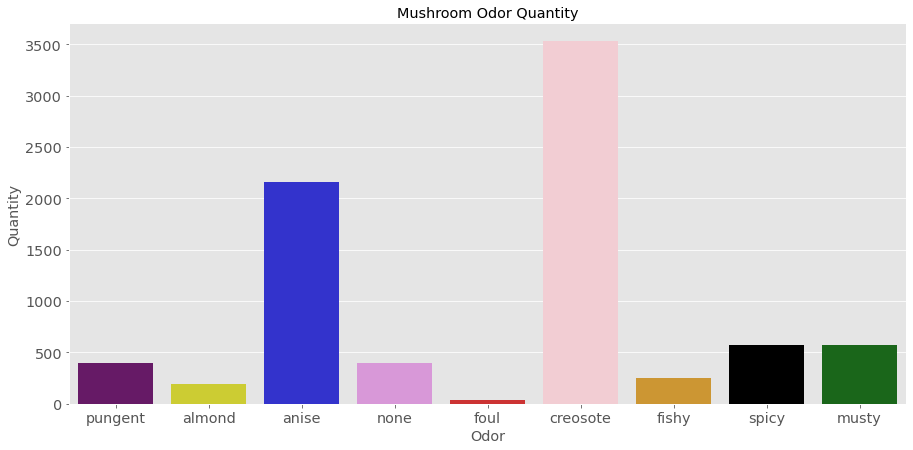

In [ ]:
# Análise da quantidade de cogumelos de acordo com odor

odor_dict = {"almond":"a","anise":"l","creosote":"c","fishy":"y",
             "foul":"f","musty":"m","none":"n","pungent":"p","spicy":"s"}
order = ['p', 'a', 'l', 'n', 'f', 'c', 'y', 's', 'm']
labels = get_labels(order, odor_dict)      
plot_col(col='odor', color=color_dict.keys(), labels=labels)

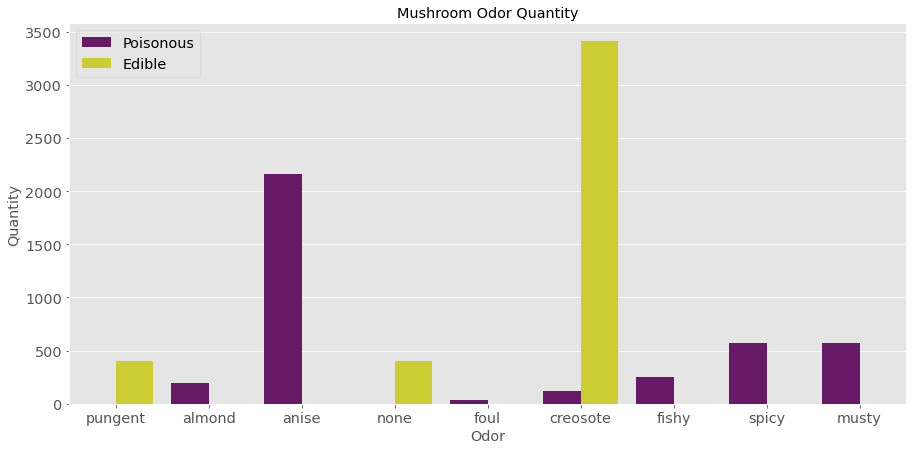

In [ ]:
# Análise da quantidade de cogumelos de acordo com odor, separados em tóxico e comestível

odor_dict = {"almond":"a","anise":"l","creosote":"c","fishy":"y",
             "foul":"f","musty":"m","none":"n","pungent":"p","spicy":"s"}
order = ['p', 'a', 'l', 'n', 'f', 'c', 'y', 's', 'm']
labels = get_labels(order, odor_dict)      
plot_col(col='odor', hue='class', color=color_dict.keys(), labels=labels)

In [ ]:
# Análise da porcentagem de cogumelos de acordo com habitat

labels = ['Woods', 'Grasses', 'Paths', 'Leaves', 'Urban', 'Meadows', 'Waste']
values = dataset_encoded['habitat'].value_counts()
colors = ['#DEB887','#778899', '#B22222', '#FFFF00', 
          '#F8F8FF','#FFE4C4','#FF69B4']

fig=go.Figure(data=[go.Pie(labels=labels,
                           values=values,
                           #marker_colors=labels,
                           pull=[0.1, 0, 0, 0, 0.2, 0, 0])])
fig.update_traces(title='Mushrooms Habitat Percentage',
                  hoverinfo='label+value', 
                  textinfo='percent', 
                  opacity=0.9,
                  textfont_size=20,
                  marker=dict(colors=colors,
                             line=dict(color='#000000', width=0.1)),
                 )
fig.show()

# Treinamento e Teste

In [ ]:
# Separando o dataset em treinamento e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.30, 
                                                    random_state=40)

In [ ]:
# Usando StandardScaler para padronizar as features, removendo a média e dimensionando para unificar a as variâncias

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [ ]:
# Usando a análise de componentes principais (PCA) para redução de dimensionalidade
# Como usamos em um dos notebooks passados pelo monitor

from sklearn.decomposition import PCA
pca = PCA(n_components = 4)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
# Essa célula aqui nos mostra o valor "ideal" de componentes do PCA
# pca.explained_variance_ratio_[3] é a posição de melhor índice
# Mostrando que 4 componentes nos dará a melhor acurácia

pca = PCA(n_components = 10)
pca.fit(X)
print(pca.explained_variance_ratio_)

[0.33758733 0.16581098 0.12285821 0.06796611 0.05831173 0.05092539
 0.04670841 0.03908416 0.03577877 0.02591613]


In [ ]:
# Criando uma função para avaliar a performance dos modelos

from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# Diferenciando entre detalhamento de score de treino e de teste

def print_score(classifier,X_train,y_train,X_test,y_test,train=True):
    if train == True:
        print("Training results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,classifier.predict(X_train))))
        print('Classification Report:\n{}\n'.format(classification_report(y_train,classifier.predict(X_train))))
        res = cross_val_score(classifier, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')
        print('Average Accuracy:\t{0:.4f}\n'.format(res.mean()))
        print('Standard Deviation:\t{0:.4f}'.format(res.std()))
    elif train == False:
        print("Test results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,classifier.predict(X_test))))
        print('Classification Report:\n{}\n'.format(classification_report(y_test,classifier.predict(X_test))))

# Primeiro Algoritmo: KNN (K Nearest Neighbors Classifier)



In [ ]:
# Fazendo o fit do KNN com o dataset de treino

from sklearn.neighbors import KNeighborsClassifier as KNN

classifier = KNN()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Resultado dos treinos

print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.9961

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2960
           1       1.00      0.99      1.00      2726

    accuracy                           1.00      5686
   macro avg       1.00      1.00      1.00      5686
weighted avg       1.00      1.00      1.00      5686


Average Accuracy:	0.9953

Standard Deviation:	0.0022


In [ ]:
# Resultado dos testes

print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.9943

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1248
           1       1.00      0.99      0.99      1190

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438




# Segundo Algoritmo: Naive Bayes Classifier

In [ ]:
# Fazendo o fit do algorimot Naive Bayes com o dataset de treino 

from sklearn.naive_bayes import GaussianNB as NB

classifier = NB()
classifier.fit(X_train,y_train)

GaussianNB()

In [ ]:
# Resultado dos treinos

print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.8932

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      2960
           1       0.93      0.84      0.88      2726

    accuracy                           0.89      5686
   macro avg       0.90      0.89      0.89      5686
weighted avg       0.90      0.89      0.89      5686


Average Accuracy:	0.8927

Standard Deviation:	0.0138


In [ ]:
# Resultado dos testes

print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.8962

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1248
           1       0.94      0.85      0.89      1190

    accuracy                           0.90      2438
   macro avg       0.90      0.90      0.90      2438
weighted avg       0.90      0.90      0.90      2438




# Terceiro Algoritmo: Decision Tree

In [ ]:
# Fazendo o fit da Decision Tree com o set de treinamento

from sklearn.tree import DecisionTreeClassifier as dt

classifier = dt(criterion='entropy', random_state = 40)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=40)

In [ ]:
# Resultado dos treinos

print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2960
           1       1.00      1.00      1.00      2726

    accuracy                           1.00      5686
   macro avg       1.00      1.00      1.00      5686
weighted avg       1.00      1.00      1.00      5686


Average Accuracy:	0.9905

Standard Deviation:	0.0036


In [ ]:
# Resultado dos testes

print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.9906

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1248
           1       0.99      0.99      0.99      1190

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438




# Análise Final

- O algoritmo KNN entrega uma acurácia de 99.61% nos treinos e de 99.43% nos testes, além de contar com uma acurácia média de 99.53% e um desvio padrão de 0.22%;

- O algoritmo Naive Bayes (Gaussian) entrega uma acurácia de 89.29% nos treinos e 89.62% nos testes, além de contar com uma acurácia média de 89.25% e um desvio padrão de 1.37%

- O algoritmo Decision Tree entrega uma acurácia de 100% nos treinos e 99.06% nos testes, além de contar com uma acurácia média de 98.96% e um desvio padrão de 0.43%

- Com isso, temos que o algoritmo de Naive Bayes, apesar de ainda muito preciso, não é páreo para o algoritmo KNN e Decision Tree no dataset dado. 